# Multi Head Attention

In [1]:
import numpy as np
import torch
import torch.nn as nn
import torch.nn.functional as F

In [2]:
sequence_length= 4
batch_size =1
input_dim= 512
d_model=512
x=torch.randn((batch_size,sequence_length,input_dim))

In [3]:
x.size()

torch.Size([1, 4, 512])

In [4]:
qkv_layer= nn.Linear(input_dim,3*d_model)
qkv_layer

Linear(in_features=512, out_features=1536, bias=True)

In [5]:
qkv=qkv_layer(x)
qkv

tensor([[[ 0.1879,  0.3536,  0.0309,  ...,  0.1717, -0.0132, -1.5548],
         [ 0.4204, -0.1364, -0.5351,  ...,  0.0685,  0.6685,  0.1447],
         [ 0.6139,  0.3866, -0.0567,  ...,  0.4234, -0.4719, -0.2524],
         [-0.0664, -0.5666, -0.2707,  ...,  0.1831, -1.0645,  0.0470]]],
       grad_fn=<ViewBackward0>)

<BarContainer object of 200 artists>

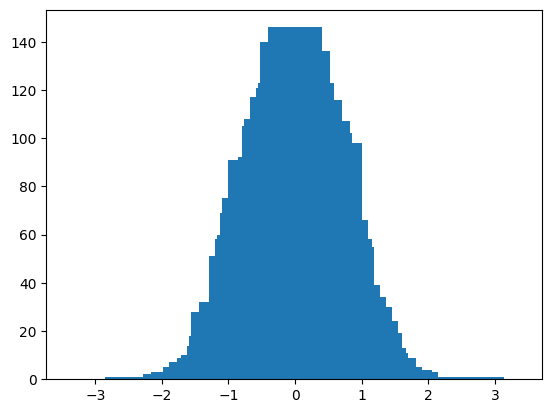

In [6]:
import matplotlib.pyplot as plt
y_val= torch.histc(qkv,bins=200,min=-3,max=3)
x_val= np.arange(-1,1,.01)*3
plt.bar(x_val,y_val, align='center')


In [7]:
num_heads=8
head_dim= d_model// num_heads
qkv=qkv.reshape(batch_size,sequence_length,num_heads,3*head_dim)
qkv.shape

torch.Size([1, 4, 8, 192])

In [8]:
qkv=qkv.permute(0,2,1,3)
qkv.shape


torch.Size([1, 8, 4, 192])

In [9]:
q,k,v= qkv.chunk(3,dim=-1)
q.shape, k.shape , v.shape

(torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]),
 torch.Size([1, 8, 4, 64]))

# Calculating attention


In [10]:
import math
d_k = q.size()[-1]
scaled= torch.matmul(q, k.transpose(-2,-1))/math.sqrt(d_k)
scaled.shape
scaled


tensor([[[[-0.2338,  0.3945,  0.3104, -0.6006],
          [ 0.3588,  0.3620, -0.1650,  0.2344],
          [ 0.3666, -0.0674, -0.0649, -0.2284],
          [-0.1949,  0.5415,  0.2887,  0.2662]],

         [[ 0.3836,  0.2950, -0.2268, -0.3536],
          [ 0.4433,  0.3283, -0.3240,  0.2819],
          [-0.2426,  0.2668,  0.3948, -0.1664],
          [-0.0544, -0.1226,  0.8586, -0.3759]],

         [[ 0.4335, -0.0129, -0.0118, -0.2546],
          [ 0.1668,  0.2917, -0.4349,  0.1476],
          [-0.3265,  0.1003, -0.0500, -0.2322],
          [-0.0431, -0.6092, -0.0560, -0.2494]],

         [[ 0.5587, -0.4020,  0.1313, -0.0526],
          [-0.2206,  0.2203,  0.0555,  0.2451],
          [ 0.5459,  0.2093,  0.3547, -0.0205],
          [-0.0528, -0.2485,  0.4023, -0.5981]],

         [[-0.0056, -0.2956, -0.0198, -0.3341],
          [-0.1474,  0.1739,  0.0471, -0.2213],
          [-0.1744,  0.1263,  0.6642,  0.0600],
          [ 0.4193,  0.1460,  0.5552, -0.4381]],

         [[ 0.1060, -0.0598,  

In [11]:
mask = torch.full(scaled.size(),float('-inf'))
mask= torch.triu(mask,diagonal=1)
mask

tensor([[[[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0., 0.]],

         [[0., -inf, -inf, -inf],
          [0., 0., -inf, -inf],
          [0., 0., 0., -inf],
          [0., 0., 0.,

In [12]:
scaled+mask

tensor([[[[-0.2338,    -inf,    -inf,    -inf],
          [ 0.3588,  0.3620,    -inf,    -inf],
          [ 0.3666, -0.0674, -0.0649,    -inf],
          [-0.1949,  0.5415,  0.2887,  0.2662]],

         [[ 0.3836,    -inf,    -inf,    -inf],
          [ 0.4433,  0.3283,    -inf,    -inf],
          [-0.2426,  0.2668,  0.3948,    -inf],
          [-0.0544, -0.1226,  0.8586, -0.3759]],

         [[ 0.4335,    -inf,    -inf,    -inf],
          [ 0.1668,  0.2917,    -inf,    -inf],
          [-0.3265,  0.1003, -0.0500,    -inf],
          [-0.0431, -0.6092, -0.0560, -0.2494]],

         [[ 0.5587,    -inf,    -inf,    -inf],
          [-0.2206,  0.2203,    -inf,    -inf],
          [ 0.5459,  0.2093,  0.3547,    -inf],
          [-0.0528, -0.2485,  0.4023, -0.5981]],

         [[-0.0056,    -inf,    -inf,    -inf],
          [-0.1474,  0.1739,    -inf,    -inf],
          [-0.1744,  0.1263,  0.6642,    -inf],
          [ 0.4193,  0.1460,  0.5552, -0.4381]],

         [[ 0.1060,    -inf,  

In [13]:
scaled+= mask
scaled

tensor([[[[-0.2338,    -inf,    -inf,    -inf],
          [ 0.3588,  0.3620,    -inf,    -inf],
          [ 0.3666, -0.0674, -0.0649,    -inf],
          [-0.1949,  0.5415,  0.2887,  0.2662]],

         [[ 0.3836,    -inf,    -inf,    -inf],
          [ 0.4433,  0.3283,    -inf,    -inf],
          [-0.2426,  0.2668,  0.3948,    -inf],
          [-0.0544, -0.1226,  0.8586, -0.3759]],

         [[ 0.4335,    -inf,    -inf,    -inf],
          [ 0.1668,  0.2917,    -inf,    -inf],
          [-0.3265,  0.1003, -0.0500,    -inf],
          [-0.0431, -0.6092, -0.0560, -0.2494]],

         [[ 0.5587,    -inf,    -inf,    -inf],
          [-0.2206,  0.2203,    -inf,    -inf],
          [ 0.5459,  0.2093,  0.3547,    -inf],
          [-0.0528, -0.2485,  0.4023, -0.5981]],

         [[-0.0056,    -inf,    -inf,    -inf],
          [-0.1474,  0.1739,    -inf,    -inf],
          [-0.1744,  0.1263,  0.6642,    -inf],
          [ 0.4193,  0.1460,  0.5552, -0.4381]],

         [[ 0.1060,    -inf,  

In [14]:
attention= F.softmax(scaled,dim=-1)
attention

tensor([[[[1.0000, 0.0000, 0.0000, 0.0000],
          [0.4992, 0.5008, 0.0000, 0.0000],
          [0.4353, 0.2820, 0.2827, 0.0000],
          [0.1588, 0.3317, 0.2576, 0.2519]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.5287, 0.4713, 0.0000, 0.0000],
          [0.2195, 0.3653, 0.4152, 0.0000],
          [0.1941, 0.1813, 0.4837, 0.1408]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.4688, 0.5312, 0.0000, 0.0000],
          [0.2597, 0.3979, 0.3424, 0.0000],
          [0.2969, 0.1685, 0.2931, 0.2415]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.3915, 0.6085, 0.0000, 0.0000],
          [0.3937, 0.2812, 0.3251, 0.0000],
          [0.2514, 0.2067, 0.3962, 0.1457]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.4204, 0.5796, 0.0000, 0.0000],
          [0.2144, 0.2896, 0.4960, 0.0000],
          [0.3002, 0.2284, 0.3440, 0.1274]],

         [[1.0000, 0.0000, 0.0000, 0.0000],
          [0.5969, 0.4031, 0.0000, 0.0000],
          [0.3250, 0.2

In [15]:
values= torch.matmul(attention,v)
values.shape

torch.Size([1, 8, 4, 64])

In [16]:
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

In [17]:
values, attention= scaled_dot_product(q,k,v,mask=mask)
attention[0][0]

tensor([[1.0000, 0.0000, 0.0000, 0.0000],
        [0.4992, 0.5008, 0.0000, 0.0000],
        [0.4353, 0.2820, 0.2827, 0.0000],
        [0.1588, 0.3317, 0.2576, 0.2519]], grad_fn=<SelectBackward0>)

In [18]:
values.size()

torch.Size([1, 8, 4, 64])

In [19]:
values=values.reshape(batch_size,sequence_length,num_heads*head_dim)
values.shape

torch.Size([1, 4, 512])

In [21]:
linear_layer= nn.Linear(d_model,d_model)
linear_layer

Linear(in_features=512, out_features=512, bias=True)

In [25]:
out=linear_layer(values)
out, values, out.shape, values.shape

(tensor([[[ 0.1289, -0.0674,  0.2131,  ...,  0.1717,  0.0915, -0.1326],
          [ 0.2200, -0.0280, -0.1859,  ..., -0.2328, -0.4718,  0.0925],
          [-0.8161, -0.2505,  0.0442,  ...,  0.4321,  0.2553, -0.0793],
          [-0.0787, -0.0902, -0.2238,  ..., -0.7640,  0.3664, -0.5680]]],
        grad_fn=<ViewBackward0>),
 tensor([[[ 0.4123,  0.3856,  0.0387,  ...,  0.1213, -0.4502, -0.1384],
          [-0.3134,  0.7883,  0.4490,  ...,  0.3652, -0.3706,  0.2227],
          [ 0.6909, -0.5541,  0.6439,  ...,  0.1293,  0.1702, -0.0158],
          [-0.7973, -0.5355, -0.4722,  ...,  0.2378, -0.2321, -0.4193]]],
        grad_fn=<ViewBackward0>),
 torch.Size([1, 4, 512]),
 torch.Size([1, 4, 512]))

In [26]:

import torch
import torch.nn as nn
import math

def scaled_dot_product(q, k, v, mask=None):
    d_k = q.size()[-1]
    scaled = torch.matmul(q, k.transpose(-1, -2)) / math.sqrt(d_k)
    if mask is not None:
        scaled += mask
    attention = F.softmax(scaled, dim=-1)
    values = torch.matmul(attention, v)
    return values, attention

class MultiheadAttention(nn.Module):

    def __init__(self, input_dim, d_model, num_heads):
        super().__init__()
        self.input_dim = input_dim
        self.d_model = d_model
        self.num_heads = num_heads
        self.head_dim = d_model // num_heads
        self.qkv_layer = nn.Linear(input_dim , 3 * d_model)
        self.linear_layer = nn.Linear(d_model, d_model)
    
    def forward(self, x, mask=None):
        batch_size, sequence_length, input_dim = x.size()
        print(f"x.size(): {x.size()}")
        qkv = self.qkv_layer(x)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.reshape(batch_size, sequence_length, self.num_heads, 3 * self.head_dim)
        print(f"qkv.size(): {qkv.size()}")
        qkv = qkv.permute(0, 2, 1, 3)
        print(f"qkv.size(): {qkv.size()}")
        q, k, v = qkv.chunk(3, dim=-1)
        print(f"q size: {q.size()}, k size: {k.size()}, v size: {v.size()}, ")
        values, attention = scaled_dot_product(q, k, v, mask)
        print(f"values.size(): {values.size()}, attention.size:{ attention.size()} ")
        values = values.reshape(batch_size, sequence_length, self.num_heads * self.head_dim)
        print(f"values.size(): {values.size()}")
        out = self.linear_layer(values)
        print(f"out.size(): {out.size()}")
        return out


In [27]:

input_dim = 1024
d_model = 512
num_heads = 8

batch_size = 30
sequence_length = 5
x = torch.randn( (batch_size, sequence_length, input_dim) )

model = MultiheadAttention(input_dim, d_model, num_heads)
out = model.forward(x)

x.size(): torch.Size([30, 5, 1024])
qkv.size(): torch.Size([30, 5, 1536])
qkv.size(): torch.Size([30, 5, 8, 192])
qkv.size(): torch.Size([30, 8, 5, 192])
q size: torch.Size([30, 8, 5, 64]), k size: torch.Size([30, 8, 5, 64]), v size: torch.Size([30, 8, 5, 64]), 
values.size(): torch.Size([30, 8, 5, 64]), attention.size:torch.Size([30, 8, 5, 5]) 
values.size(): torch.Size([30, 5, 512])
out.size(): torch.Size([30, 5, 512])
